# Исследование объявлений о продаже квартир
## Описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Постановка задачи
В ходе работы необходимо выяснить какие параметры влияют на общую стоимость квартир и на стоимость квадратного метра. Для этого необходимо выполнить следующие шаги:
- ознакомится с данными;
- обработка пропусков, аномальных значений и дубликатов;
- дополнение данных, при необходимости;
- изучение влияния отдельных параметров на стоимость;
- выводы о полученной информации.

# Решение задачи
## Шаг 1. Знакомство с данными и изучение общей информации.

Импортируем необходимые библиотеки для дальнейшей работы.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Чтение файла с данными и вывод первых пяти строчек таблицы для ознакомления.

In [72]:
pd.options.display.max_columns = 50
realty_data = pd.read_csv('real_estate_data.csv', sep='\t')
realty_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получение информации о датафрейме.

In [73]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [74]:
# Какую долю составляют пропущенные значения
print('Всего значений в таблице {0}, из них пропущено от {1} до {2} значений, доля пропущенных '
      'равна от {3:.2%} до {4:.2%}.'.format(len(realty_data), realty_data['floors_total'].isna().sum(),
                                            realty_data['is_apartment'].isna().sum(),
                                            realty_data['floors_total'].isna().sum() / len(realty_data),
                                            realty_data['is_apartment'].isna().sum() / len(realty_data)))

Всего значений в таблице 23699, из них пропущено от 86 до 20924 значений, доля пропущенных равна от 0.36% до 88.29%.


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

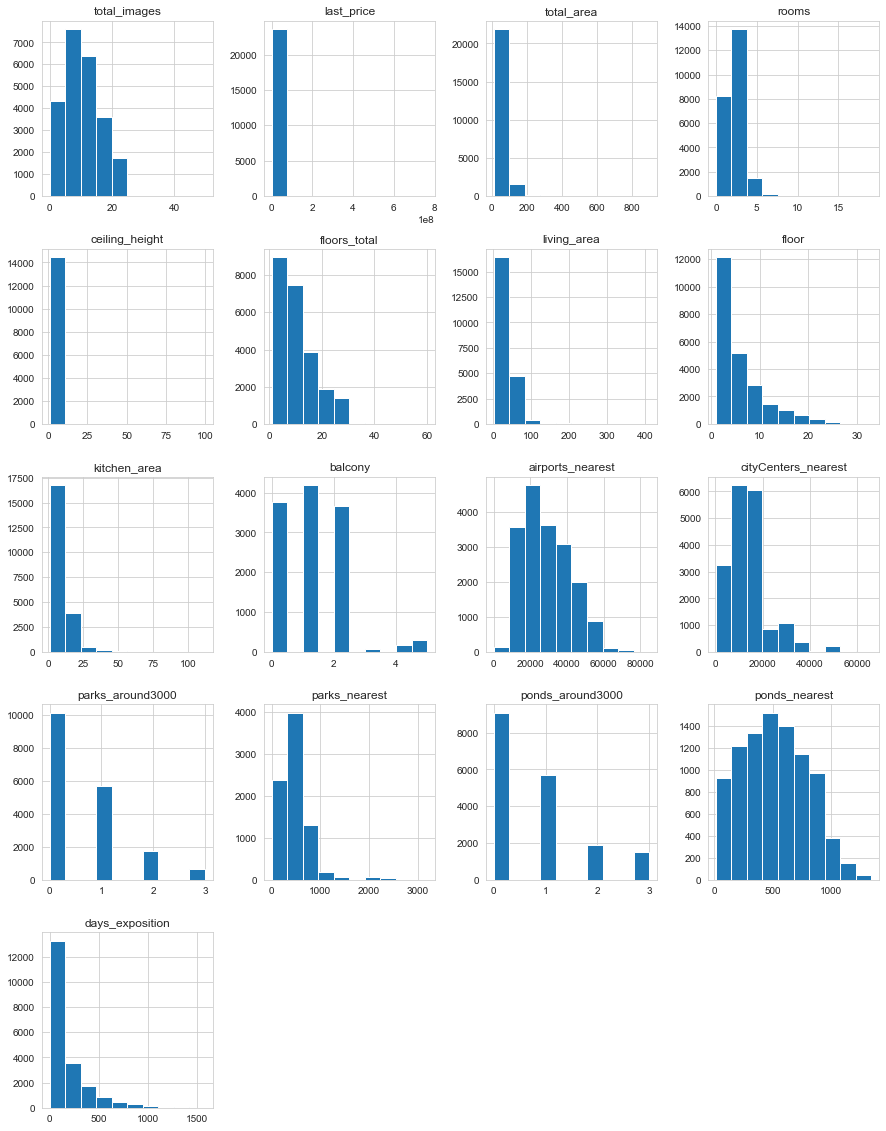

In [75]:
realty_data.hist(figsize=(15, 20))

Посмотрим что заметно на общих графиках и на что стоит обратить внимание. В первую заметны "хвосты" для таких параметров как:

- цена (хвост заканчивается на отметке около 800 млн, хотя основная часть существенно меньше),
- общая площадь (хвост с очень маленьким количеством значеий тянется за 800 кв. м),
- количество комнат (видно, что основная масса квартир имеет до 5, но есть в продаже и больше 15 комнат в квартире),
- высота потолков (что очень странно, но достигает значения в 100 м),
- общее количество этажей в доме (здесь распределение похоже на правдоподобное, но хвост в 60 этажей присутствует),
- жилая площадь (хвост с очень маленьким количеством значеий тянется к 400 кв. м),
- площадь кухни (хвост с очень маленьким количеством значеий тянется за 100 кв. м),
- балконы (выбиваются из графика значения в 3 балкона),
- срок размещения объявления (хвост тянется за 4 года, кто-то очень долго продает квартиру).

Проверим разброс данных и примем решение что делать с ними дальше.

Узнаем разброс данных в каждом столбце, чтобы иметь представление о наполнении таблицы и, возможно, уже на этом этапе заметить аномалии.

In [76]:
realty_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Наблюдение:** В некоторых столбцах есть пропуски больше 80%, нужно проверить какие данные можно заменить средними или медианными значениями, а какие лучше будет отбросить из датафрейма. Так же есть проблемы с типами данных.

*Теория по наблюдению:* Для дальнейшей работы необходимо внести в указанные столбцы следующие изменения:
- `first_day_exposition` - лучше заменить тип на datetime;
- `ceiling_height` - по возможности необходимо избавиться от нулевых значений, обработать такие аномалии как высота потолков 1 м и высота потолков 100 м;
- `floors_total` - необходимо привести к типу int, т.к. количество этажей - целое значение и избавиться от нулевых значений;
- `is_apartment` - изменить тип на bool и избавиться от пропущенных значений;
- `living_area` - избавиться от пропущенных значений, обработать такие аномалии как жилая площадь 2 кв.м;
- `kitchen_area` - избавиться от пропущенных значений;
- `balcony` - избавиться от пропущенных значений;
- `locality_name`  - избавиться от нулевых значений и возможных дубликатов;
- `airports_nearest` - по возможности избавиться от нулевых значений;
- `cityCenters_nearest` - по возможности избавиться от нулевых значений;
- `parks_around3000` - тип должен быть int и по возможности избавиться от нулевых значений;
- `parks_nearest`  - по возможности избавиться от нулевых значений;
- `ponds_around3000` - тип должен быть int и по возможности избавиться от нулевых значений;
- `ponds_nearest` - по возможности избавиться от нулевых значений;
- `days_exposition` - изменить тип на int и избавиться от пропущенных значений.

## Шаг 2. Предобработка данных
### Работа с пропусками и замена типов данных

Приведем данные с датой в правильный формат.

In [77]:
# Изменим формат даты публикации на специальный формат даты
realty_data['first_day_exposition'] = pd.to_datetime(realty_data['first_day_exposition'], format='%Y-%m-%d')
realty_data['first_day_exposition'].describe(datetime_is_numeric=True)

count                            23699
mean     2017-11-08 21:55:18.975484160
min                2014-11-27 00:00:00
25%                2017-05-12 12:00:00
50%                2017-12-12 00:00:00
75%                2018-08-26 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Чтобы заполнить пропуски в `days_exposition` нельзя, потому что пропуск обозначает, что объявление ещё не снято с публикации. Чтобы отделить такие объявления от снятых, заполним пропуски явно выделяющимся значением `-1`. Для корректной работы нужны заполненные пропуски. При дальнейших расчетах будут учитываться замены, но сейчас нужны целочисленные значения.

In [78]:
realty_data['days_exposition'] = realty_data['days_exposition'].fillna(-1)
# Изменим тип данных на целочисленный
realty_data['days_exposition'] = realty_data['days_exposition'].astype('int64')

print('Пропущено {0} значений даты, {1} значений количества дней, доля пропущенных равна {2:.2%}.'.format(
    realty_data['first_day_exposition'].isna().sum(), realty_data['days_exposition'].isna().sum(),
    realty_data['days_exposition'].isna().sum() / len(realty_data)))

Пропущено 0 значений даты, 0 значений количества дней, доля пропущенных равна 0.00%.


Рассмотрим интересующие нас для исследования столбцы. В столбцах площадь, цена и число комнат пропусков нет. Однако высота потолков часто пропущена. Минимальное значение в 1 м и максимальное в 100м явно ошибочны. Скорее всего, если высота потолков в квартире "обычная", то люди этого и не указывали. Среднее значение 2.78 метра похоже на правду, так как в России средняя высота потолков в хрущевках 2.4 метра, в новостройках 2.5-2.7 метров, а в элитном жилье и старом фонде может оставлять больше 3 метров.

В основном дома строятся по типовым проектам. Логично заполнить пропущенные значения и аномалии (за аномалии считается высота ниже 2.4 м и выше 4.5 м) медианой по домам со схожей этажностью.

In [79]:
print('Изначально пропущено {0} значений высоты потолков, доля пропущенных равна {1:.2%}.'.format(
    realty_data['ceiling_height'].isna().sum(), realty_data['ceiling_height'].isna().sum() / len(realty_data)))
realty_data.loc[realty_data['ceiling_height'] < 2.4, 'ceiling_height'] = np.nan
realty_data.loc[realty_data['ceiling_height'] > 4.5, 'ceiling_height'] = np.nan
realty_data['ceiling_height'] = realty_data['ceiling_height'].fillna(
    realty_data.groupby('floors_total')['ceiling_height'].transform('median'))

print('После заполнения осталось пропущено {0} значений высоты потолков, доля пропущенных равна {1:.2%}.'.format(
    realty_data['ceiling_height'].isna().sum(), realty_data['ceiling_height'].isna().sum() / len(realty_data)))

Изначально пропущено 9195 значений высоты потолков, доля пропущенных равна 38.80%.
После заполнения осталось пропущено 79 значений высоты потолков, доля пропущенных равна 0.33%.


Для некоторых квартир владельцы не указали этажность зданий, из-за чего не все пропуски удалось заполнить, однако 0.33% пропусков звучит намного лучше, чем 38.80%, такое небольшое число пропусков можно смело удалять, оно не повредит выборке.

In [80]:
realty_data.drop(realty_data[realty_data['ceiling_height'].isna() == True].index, inplace=True)

Так как при заполнении столбца `ceiling_height` были использованы данные об общем количестве этажей в домах, то можно проверить остались ли после удаления строк с пропусками в этом столбце пропуски в столбце `floors_total`.

In [81]:
print('После заполнения осталось пропущено {0} значений общего количества этажей, доля '
      'пропущенных равна {1:.2%}.'.format(realty_data['floors_total'].isna().sum(),
                                          realty_data['floors_total'].isna().sum() / len(realty_data)))

После заполнения осталось пропущено 9 значений общего количества этажей, доля пропущенных равна 0.04%.


Что же, таким небольшим количеством пропусков можно пренебречь и удалить из датафрейма.

In [82]:
realty_data.drop(realty_data[realty_data['floors_total'].isna() == True].index, inplace=True)

В самом начале знакомства с данными было замечено, что количество заполненных значений в столбце `is_apartment` всего 2775, что составляет меньше 12%. Такое могло случиться, если данную категорию добавили позже, чем все остальные. Заменим все пропуски на `False`, тем самым приведя к булевому типу.

In [83]:
realty_data['is_apartment'] = realty_data['is_apartment'].fillna(False)

Пропуски в столбце `balcony` скорее всего означает, что балкона в квартире нет, и эти пропуски можно заполнить нулевыми значениями и привести к целочисленному типу.

In [84]:
realty_data['balcony'] = realty_data['balcony'].fillna(0).astype('int64')

Так как не имея точного адреса узнать и заполнить картографические пропуски не представляется возможным, то заменим пропуски на `-1` и изменим тип данных на целочисленный ещё для нескольких столбцов.

In [85]:
realty_data['floors_total'] = realty_data['floors_total'].astype('int64')
realty_data['last_price'] = realty_data['last_price'].astype('int64')
for index in ['airports_nearest', 'cityCenters_nearest',
              'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
    realty_data[index] = realty_data[index].fillna(-1).astype('int64')

In [86]:
# check
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23611 non-null  int64         
 1   last_price            23611 non-null  int64         
 2   total_area            23611 non-null  float64       
 3   first_day_exposition  23611 non-null  datetime64[ns]
 4   rooms                 23611 non-null  int64         
 5   ceiling_height        23611 non-null  float64       
 6   floors_total          23611 non-null  int64         
 7   living_area           21741 non-null  float64       
 8   floor                 23611 non-null  int64         
 9   is_apartment          23611 non-null  bool          
 10  studio                23611 non-null  bool          
 11  open_plan             23611 non-null  bool          
 12  kitchen_area          21380 non-null  float64       
 13  balcony         

### Обработка аномалий

Аномальные значения в столбце `ceiling_height` были обработаны вместе с пропусками, но остались еще `living_area`, где встретилась жилая площадь 2 кв.м, и `kitchen_area`, где площадь кухни составила 1.3 кв.м. Для понимания какие площади считать аномальными обратимся к правовым документам, а именно СП 54.13330.2016 Здания жилые многоквартирные:
5.7 Площадь квартир социального использования государственного и муниципального жилищных фондов согласно ЖК РФ должна быть не менее:
- Общей жилой комнаты в однокомнатной квартире — 14 кв.м.
- Общей жилой комнаты в квартирах с числом комнат две и более — 16 кв.м.
- Спальни — 8 кв.м (на двух человек — 10 кв.м); кухни — 8 кв.м.
- Кухонной зоны в кухне-столовой — 6 кв.м.
- В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 кв.м.

 Для квартир-студий соблюдением норматива можно считать общую площадь 25 кв.м и больше.

Исходя из полученных данных, за аномалии можно считать жилую площадь меньше 14 кв.м, а площадь кухни меньше 5 кв.м или студию общей площадью больше 25 кв.м. Создадим дополнительный столбец-фильтр, в котором будет указано соответствие нормативам.

In [87]:
def is_standards(row):
    if row['studio'] and row['total_area'] < 25:
        return False
    elif row['living_area'] < 14 or row['kitchen_area'] < 5:
        return False
    else:
        return True


realty_data['meet_standards'] = realty_data.apply(is_standards, axis=1)
print('Объявлений с нарушениями {0}, доля нарушений равна {1:.2%}.'.format(
    sum(realty_data['meet_standards'] == False),
    sum(realty_data['meet_standards'] == False) / len(realty_data)))

Объявлений с нарушениями 453, доля нарушений равна 1.92%.


Квартиры с нарушениями продавать нельзя, к тому же их немного, а значит спокойно удалить из датафрейма, заодно удалив вспомогательный столбец.

In [88]:
realty_data.drop(realty_data[realty_data['meet_standards'] == False].index, inplace=True)
realty_data = realty_data.drop('meet_standards', axis=1)

Так как дома в основном строятся по типовым проектам, то разумно заполнить пропуски медианами по схожим квартирам.

In [89]:
print('Всего значений в таблице {0}, из них пропущено для жилой площади '
      'или площади кухонь {1} значений, доля пропущенных равна {2:.2%}.'
      .format(len(realty_data),
              len(realty_data[(realty_data['living_area'].isna() == True) |
                              (realty_data['kitchen_area'].isna() == True)]),
              len(realty_data[(realty_data['living_area'].isna() == True) |
                              (realty_data['kitchen_area'].isna() == True)]) /
              len(realty_data)))

Всего значений в таблице 23158, из них пропущено для жилой площади или площади кухонь 2592 значений, доля пропущенных равна 11.19%.


In [90]:
part_live_in_studio = realty_data.loc[realty_data['studio'] == True, 'living_area'] / realty_data.loc[
    realty_data['studio'] == True, 'total_area']
# Средняя доля жилой площади в студиях
part_live_in_studio = part_live_in_studio.dropna().mean()
# Меняем значение жилой площади в студии на = доля * общую
realty_data.loc[(realty_data['living_area'].isna() == True) &
                (realty_data['studio'] == True), 'living_area'] = \
    realty_data.loc[(realty_data['living_area'].isna() == True) &
                    (realty_data['studio'] == True), 'total_area'] * part_live_in_studio
# Меняем значение площади кухни в студии на 0
realty_data.loc[(realty_data['kitchen_area'].isna() == True) &
                (realty_data['studio'] == True), 'living_area'] = 0


Проверим какое количество комнат и какие площади считать аномальными, чтобы безболезненно убрать и спокойно заполнить оставшиеся пропуски.

In [91]:
realty_data['rooms'].value_counts()

2     7855
1     7685
3     5778
4     1175
5      325
0      146
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Что же, квартиры больше чем с 10 комнатами можно считать аномалиями.

In [92]:
realty_data = realty_data.loc[realty_data['rooms'] < 10]
realty_data['rooms'].value_counts()

2    7855
1    7685
3    5778
4    1175
5     325
0     146
6     104
7      59
8      12
9       8
Name: rooms, dtype: int64

Еще на моменте знакомства с данными на графике для общей площади был заметен хвост, который тянулся после 200 кв. м. Посмотрим можно ли его считать аномалией.

<AxesSubplot:>

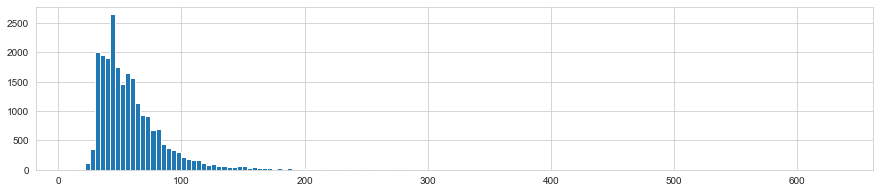

In [93]:
realty_data.total_area.hist(bins=150, figsize=(15, 3))

<AxesSubplot:>

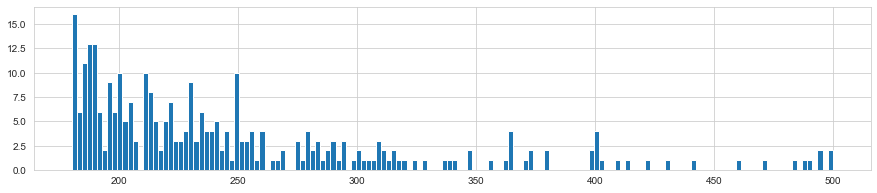

In [94]:
realty_data.total_area.hist(bins=150, figsize=(15, 3), range=(180, 500))

In [95]:
print('Квартир с аномально большой площадью всего {0}, их доля равна {1:.2%}.'.format(
    len(realty_data.loc[realty_data['total_area'] > 200]),
    len(realty_data.loc[realty_data['total_area'] > 200]) / len(realty_data)))

Квартир с аномально большой площадью всего 217, их доля равна 0.94%.


Такие квартиры тоже можно удалить

In [96]:
realty_data = realty_data.loc[realty_data['total_area'] < 200]

In [97]:
for index in range(0, 9):
    part_live = realty_data.loc[realty_data['rooms'] == index, 'living_area'] / realty_data.loc[
        realty_data['rooms'] == index, 'total_area']
    # Средняя доля жилой площади в студиях
    part_live = part_live.dropna().mean()
    # Меняем значение жилой площади в студии на = доля * общую
    realty_data.loc[(realty_data['living_area'].isna() == True) &
                    (realty_data['rooms'] == index), 'living_area'] = \
        realty_data.loc[(realty_data['living_area'].isna() == True) &
                        (realty_data['rooms'] == index), 'total_area'] * part_live
    # Меняем значение площади кухни
    part_kitchen = realty_data.loc[realty_data['rooms'] == index, 'kitchen_area'] / \
                   realty_data.loc[realty_data['rooms'] == index, 'total_area']
    # Средняя доля площади в кухнях
    part_kitchen = part_kitchen.dropna().mean()
    # Меняем значение жилой площади в студии на = доля * общую
    realty_data.loc[(realty_data['kitchen_area'].isna() == True) &
                    (realty_data['rooms'] == index), 'kitchen_area'] = \
        realty_data.loc[(realty_data['kitchen_area'].isna() == True) &
                        (realty_data['rooms'] == index), 'total_area'] * part_kitchen

Посмотрим сколько данных осталось пропущено для каждого критерия площади.

In [98]:
print('После заполнения осталось {0} значений, выбивающихся из нормальных значений, их '
      'доля равна {1:.2%}.'.format(
    len(realty_data.query('total_area * 0.9 <= (living_area + kitchen_area) and studio == False')),
    len(realty_data.query('total_area * 0.9 <= (living_area + kitchen_area) and studio == False')) /
    len(realty_data)))
print('После заполнения осталось пропущено для жилой площади или площади кухонь {0} значений, '
      'доля пропущенных равна {1:.2%}.'.format(
        len(realty_data[(realty_data['living_area'].isna() == True) |
                        (realty_data['kitchen_area'].isna() == True)]),
        len(realty_data[(realty_data['living_area'].isna() == True) |
                        (realty_data['kitchen_area'].isna() == True)]) /
        len(realty_data)))

После заполнения осталось 623 значений, выбивающихся из нормальных значений, их доля равна 2.72%.
После заполнения осталось пропущено для жилой площади или площади кухонь 145 значений, доля пропущенных равна 0.63%.


Чуть меньше 3 процентов неправильно заполненных строк, мне кажется возможным избавиться от этих данных.

In [99]:
realty_data.drop(
    realty_data[(realty_data['living_area'].isna() == True) |
                (realty_data['kitchen_area'].isna() == True)].index,
    inplace=True)
realty_data = realty_data.loc[
    realty_data['total_area'] * 0.9 >= (realty_data['living_area'] + realty_data['kitchen_area'])]

### Обработка дубликатов
В этом блоке необходимо почистить данные от повторяющихся значений. Если в данных присутствуют строки-дубликаты, необходимо удалить их. Также нужно проверить таблицу на неявные дубликаты.

Проверим пропуски в данных населенных пунктов, если их много, то придется думать как можно их восстановить, в ином случае можно будет удалить.

In [100]:
print('Пропущено {0} строк для населенных пунктов, доля пропущенных равна {1:.2%}.'.format(
    realty_data['locality_name'].isna().sum(),
    realty_data['locality_name'].isna().sum() / len(realty_data)))

Пропущено 45 строк для населенных пунктов, доля пропущенных равна 0.20%.


Что же, таким небольшим количеством пропусков можно пренебречь и удалить из датафрейма.

In [101]:
realty_data.drop(realty_data[realty_data['locality_name'].isna() == True].index, inplace=True)
# Подсчет явных дубликатов в таблице
print('В таблице есть {0} одинаковых строк.'.format(realty_data.duplicated().sum()))

В таблице есть 0 одинаковых строк.


In [102]:
print('Уникальные населённые пункты:', realty_data['locality_name'].sort_values().unique())

Уникальные населённые пункты: ['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Бато

Явных дубликатов в таблице нет, а вот дубликатов в названиях много, так некоторые пользователи пишут поселок через `ё`, а некоторые через `е` и это уже разные значения.

In [103]:
realty_data['locality_name'] = realty_data['locality_name'].replace(
    regex=['городского типа ', 'городской ', 'деревня ', 'коттеджный ', 'поселок ',
           'посёлок ', 'при железнодорожной ', 'село ', 'станции '], value='')
print('Уникальные населённые пункты:', realty_data['locality_name'].sort_values().unique())

Уникальные населённые пункты: ['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпосёлок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино

### Итоги предобработки

Были заменены пропуски в высоте потолков, количестве дней размещения объявления, площади кухни и жилой комнаты, названии населенного пункта. Был заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы. Пропуски расстояния до центра города не получится чем-либо заменить, так же как и расстояния до ближайшего аэропорта, водоема или парка. Иначе искать зависимость цены от расстояния до центра будет некорректно.

In [104]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22126 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22126 non-null  int64         
 1   last_price            22126 non-null  int64         
 2   total_area            22126 non-null  float64       
 3   first_day_exposition  22126 non-null  datetime64[ns]
 4   rooms                 22126 non-null  int64         
 5   ceiling_height        22126 non-null  float64       
 6   floors_total          22126 non-null  int64         
 7   living_area           22126 non-null  float64       
 8   floor                 22126 non-null  int64         
 9   is_apartment          22126 non-null  bool          
 10  studio                22126 non-null  bool          
 11  open_plan             22126 non-null  bool          
 12  kitchen_area          22126 non-null  float64       
 13  balcony         

In [105]:
realty_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22126.000000,2.212600e+04,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000
mean,9.883169,6.061731e+06,58.788744,2.064720,2.700327,10.635858,33.540762,5.848233,10.230567,0.594640,22164.941924,11001.779083,0.233255,166.895553,0.351623,197.334765,156.469945
std,5.673126,6.250889e+06,26.256774,0.975156,0.219413,6.518421,17.218218,4.821807,4.919047,0.962514,16471.676741,9648.789777,0.969622,306.652860,1.104165,305.639908,213.533990
min,0.000000,1.219000e+04,13.000000,1.000000,2.400000,1.000000,0.000000,1.000000,3.210180,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,3.490000e+06,40.800000,1.000000,2.550000,5.000000,19.000000,2.000000,7.116581,0.000000,10403.750000,2424.000000,0.000000,-1.000000,0.000000,-1.000000,23.000000
50%,9.000000,4.650000e+06,52.205000,2.000000,2.650000,9.000000,30.000000,4.000000,9.046527,0.000000,21873.000000,11371.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000
75%,14.000000,6.700000e+06,69.300000,3.000000,2.750000,15.000000,42.000000,8.000000,11.510000,1.000000,34591.250000,15290.000000,1.000000,304.000000,1.000000,387.000000,199.000000
max,50.000000,3.300000e+08,199.200000,8.000000,4.500000,60.000000,150.800000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [106]:
#Введем новый столбец, где цена квадратного метра будет равна стоимости квартиры деленной на площадь
realty_data['price_for_meter'] = realty_data['last_price'] / realty_data['total_area']

In [107]:
#С помощью стандартной функции находим дни недели публикации
realty_data['weekday'] = realty_data['first_day_exposition'].dt.weekday
#С помощью стандартной функции находим месяц публикации
realty_data['month'] = realty_data['first_day_exposition'].dt.month
#С помощью стандартной функции находим год публикации
realty_data['year'] = realty_data['first_day_exposition'].dt.year

In [108]:
# Введем функцию, которая классифицирует этаж квартиры
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] < 1:
        return 'ниже первого'
    else:
        return 'другой'


# Создадим новый столбец с помощью функции
realty_data['floor_category'] = realty_data.apply(floor_category, axis=1)

In [109]:
# Введем функцию, которая переводит расстояние в км
def city_centers_km(row):
    if row['cityCenters_nearest'] == -1:
        return -1
    else:
        return row['cityCenters_nearest'] / 1000


# Создадим новый столбец с помощью функции
realty_data['cityCenters_km'] = realty_data.apply(city_centers_km, axis=1).astype('int64')

Проверим новые данные.

In [110]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22126 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22126 non-null  int64         
 1   last_price            22126 non-null  int64         
 2   total_area            22126 non-null  float64       
 3   first_day_exposition  22126 non-null  datetime64[ns]
 4   rooms                 22126 non-null  int64         
 5   ceiling_height        22126 non-null  float64       
 6   floors_total          22126 non-null  int64         
 7   living_area           22126 non-null  float64       
 8   floor                 22126 non-null  int64         
 9   is_apartment          22126 non-null  bool          
 10  studio                22126 non-null  bool          
 11  open_plan             22126 non-null  bool          
 12  kitchen_area          22126 non-null  float64       
 13  balcony         

In [111]:
realty_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday,month,year,cityCenters_km
count,22126.000000,2.212600e+04,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,22126.000000,2.212600e+04,22126.000000,22126.000000,22126.000000,22126.000000
mean,9.883169,6.061731e+06,58.788744,2.064720,2.700327,10.635858,33.540762,5.848233,10.230567,0.594640,22164.941924,11001.779083,0.233255,166.895553,0.351623,197.334765,156.469945,9.789914e+04,2.568743,6.397361,2017.371780,10.388954
std,5.673126,6.250889e+06,26.256774,0.975156,0.219413,6.518421,17.218218,4.821807,4.919047,0.962514,16471.676741,9648.789777,0.969622,306.652860,1.104165,305.639908,213.533990,4.527342e+04,1.789801,3.493907,1.037549,9.783585
min,0.000000,1.219000e+04,13.000000,1.000000,2.400000,1.000000,0.000000,1.000000,3.210180,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.118349e+02,0.000000,1.000000,2014.000000,-1.000000
25%,6.000000,3.490000e+06,40.800000,1.000000,2.550000,5.000000,19.000000,2.000000,7.116581,0.000000,10403.750000,2424.000000,0.000000,-1.000000,0.000000,-1.000000,23.000000,7.619048e+04,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.650000e+06,52.205000,2.000000,2.650000,9.000000,30.000000,4.000000,9.046527,0.000000,21873.000000,11371.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000,9.449735e+04,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.700000e+06,69.300000,3.000000,2.750000,15.000000,42.000000,8.000000,11.510000,1.000000,34591.250000,15290.000000,1.000000,304.000000,1.000000,387.000000,199.000000,1.132348e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,3.300000e+08,199.200000,8.000000,4.500000,60.000000,150.800000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,65.000000


### Вывод
В таблицу были добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикации объявления и по возможности расстояние до центра города.

## Шаг 4. Проведите исследовательский анализ данных:

### Изучим доступные параметры.
 Выведем графики общей площади, жилой площади, площади кухни, цены объекта, количества комнат, высоты потолков, этажа квартиры, общего количества этажей в доме, расстояния до центра города в метрах, расстояния до ближайшего аэропорта, расстояния до ближайшего парка, день и месяц публикации объявления.

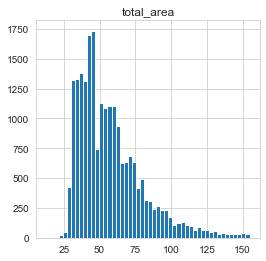

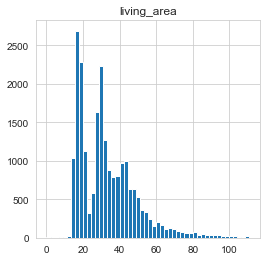

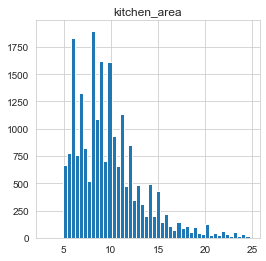

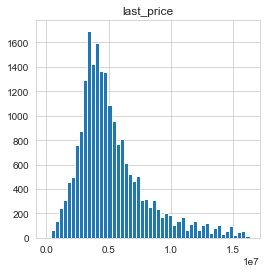

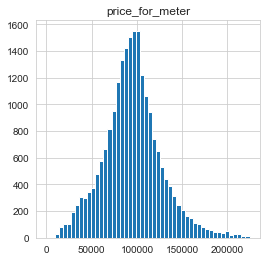

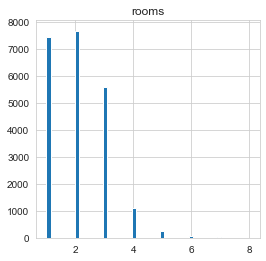

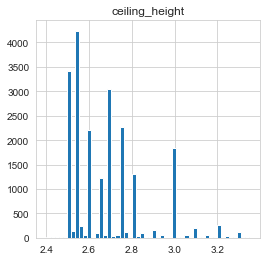

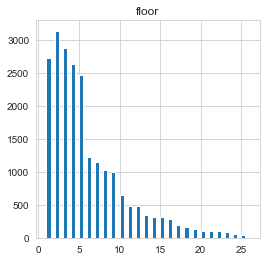

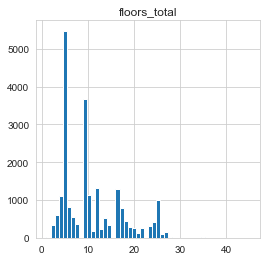

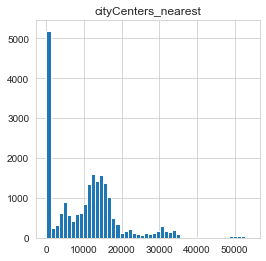

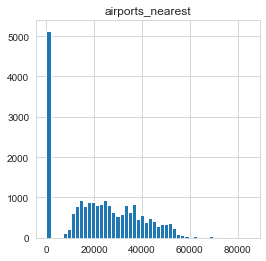

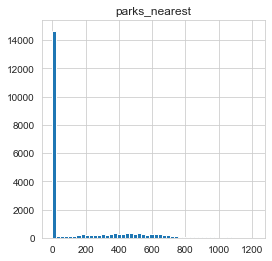

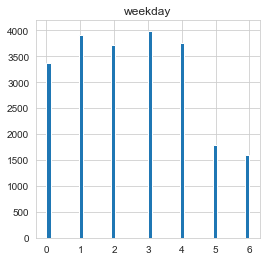

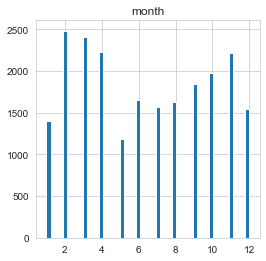

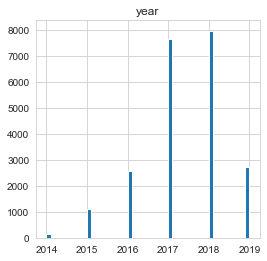

In [112]:
#Введем цикл для автоматического построения гистограмм за вычетом выбросов
realty_data_chek = realty_data.loc[:,
                   ['total_area', 'living_area', 'kitchen_area', 'last_price', 'price_for_meter', 'rooms',
                    'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest', 'airports_nearest',
                    'parks_nearest', 'weekday', 'month', 'year']]

for column in realty_data_chek:

    qr = realty_data[column].quantile(.75) - realty_data[column].quantile(.25)  #считает межквартильный размах

    mini = realty_data[column].min()  # считает нижний диапазон
    qmin = realty_data[column].quantile(.25) - qr * 3
    if qmin < mini:
        qmin = mini
    else:
        qmin = qmin

    maxi = realty_data[column].max()  # считает верхний диапазон
    qmax = realty_data[column].quantile(.75) + qr * 3
    if qmax > maxi:
        qmax = maxi
    else:
        qmax = qmax

    realty_data_chek.hist(column, bins=50, range=(qmin, qmax), figsize=(4, 4))  #строит гистограммы в нужном диапазоне

Гистограмма стоимости квадратного метра похожа на нормальное распределение с пиком на 100к за квадратный метр. Гистограмма стоимости квартиры скошена и имеет пик в районе 3 миллионов. При этом имеются и подозрительно маленькие и большие значения стоимости. Наиболее частые размеры квартир около 45 кв. метров. После 125 кв. метров имеется хвост. Но имеются и квартиры меньше 20 кв. метров. Высота потолков имеет пик в районе 2.7 метров. Наиболее часто встречающаяся высота потолков 2.5-3.1 метра. Чаще всего встречаются однокомнатные квартиры, реже 2 и 3 комнатные. Заметно выделяются дома типового строительства на 5 и 9 этажей.
Так же заметен рост цифрового рынка недвижимости. Не стоит забывать, что данные доступны до начала мая 2019.

### Изучим время продажи квартиры.
Построим гистограмму. Посчитаем среднее и медиану. Узнаем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [113]:
print('Среднее время продажи {0:.2f}, медиана времени {1}'.format(
    realty_data.loc[realty_data['days_exposition'] > 0]['days_exposition'].mean(),
    realty_data.loc[realty_data['days_exposition'] > 0]['days_exposition'].median()))

Среднее время продажи 180.90, медиана времени 96.0


Значительная разница медианы и среднего значения подтверждает наличие выбросов. Построим гистограмму по времени продажи квартиры.

-1     2972
 45     833
 60     515
 7      208
 30     193
 90     185
 4      162
 3      150
 5      140
 14     134
Name: days_exposition, dtype: int64

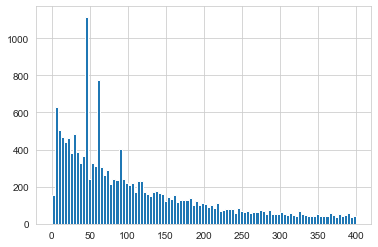

In [114]:
realty_data['days_exposition'].hist(bins=100, range=(0, 400))
realty_data['days_exposition'].value_counts().head(10)

**Вывод:** судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму подробную гистограмму, обнаружили выбивающиеся значения - аномалии на 45, 60, 90 днях - это наиболее популярное количество дней до снятия объявления.
Проверив правила размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически. <https://yandex.ru/support/realty/owner/home/add-ads-housing.html>

Наверное, можно убрать эти значения из выборки, но нужно подумать есть ли еще критерии для снятия таких объявлений, ведь часть из таких квартир могла и правда продаться в этот срок.



### Уберем редкие и выбивающиеся значения.
Опишем, какие особенности были обнаружены.

Среднее время продажи 191.82, медиана времени 111.0


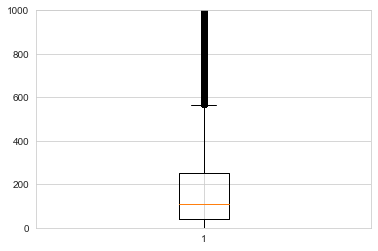

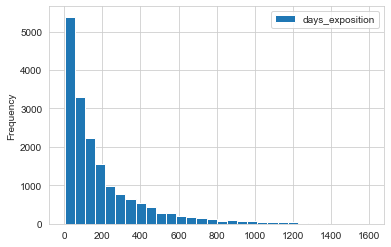

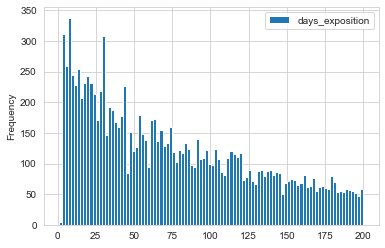

In [115]:
# Отфильтруем данные от аномалий и запишем их в новый датафрейм realty_good_data
realty_good_data = realty_data.loc[(realty_data['days_exposition'] != 45) &
                                   (realty_data['days_exposition'] != 60) &
                                   (realty_data['days_exposition'] != 90)]

# realty_good_data = realty_good_data['days_exposition'].replace(-1, np.nan)
# Диаграмма размаха
plt.boxplot(realty_good_data.loc[realty_good_data['days_exposition'] > 0]['days_exposition'])
plt.ylim(0, 1000)

# Гистограммы
realty_good_data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1, 1600))
realty_good_data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1, 200))

#среднее значение, медиана и межквартильный размах
realty_good_data.loc[realty_good_data['days_exposition'] > 0]['days_exposition'].describe()
print('Среднее время продажи {0:.2f}, медиана времени {1}'.format(
    realty_good_data.loc[realty_good_data['days_exposition'] > 0]['days_exposition'].mean(),
    realty_good_data.loc[realty_good_data['days_exposition'] > 0]['days_exposition'].median()))

В очищенных от аномалий данных получаем б*о*льшие значения медианы и среднего значения - 111 и 191 соответственно, вместо 96 и 180. Аналогично, теперь нормальные значения располагаются от 1 до 600 дней вместо разброса от 1 до 500 дней.

<div class="alert alert-info">
Доп. исследование цены за квадратный мерт, исследование общей стоимости идет следющим пунктом.
</div>

### Узнаем, какие факторы больше всего влияют на стоимость квартиры за квадратный метр.
 Изучим, зависит ли цена квадратного метра от следующих параметров:
   - общей площади;
   - жилой площади;
   - площади кухни;
   - количество комнат;
   - типа этажа, на котором расположена квартира (первый, последний, другой);
   - даты размещения (день недели, месяц, год);

Также изучим зависимость от даты размещения: дня недели, месяца и года. Для этого для начала построим тепловую карту матрицы корреляции.

<AxesSubplot:>

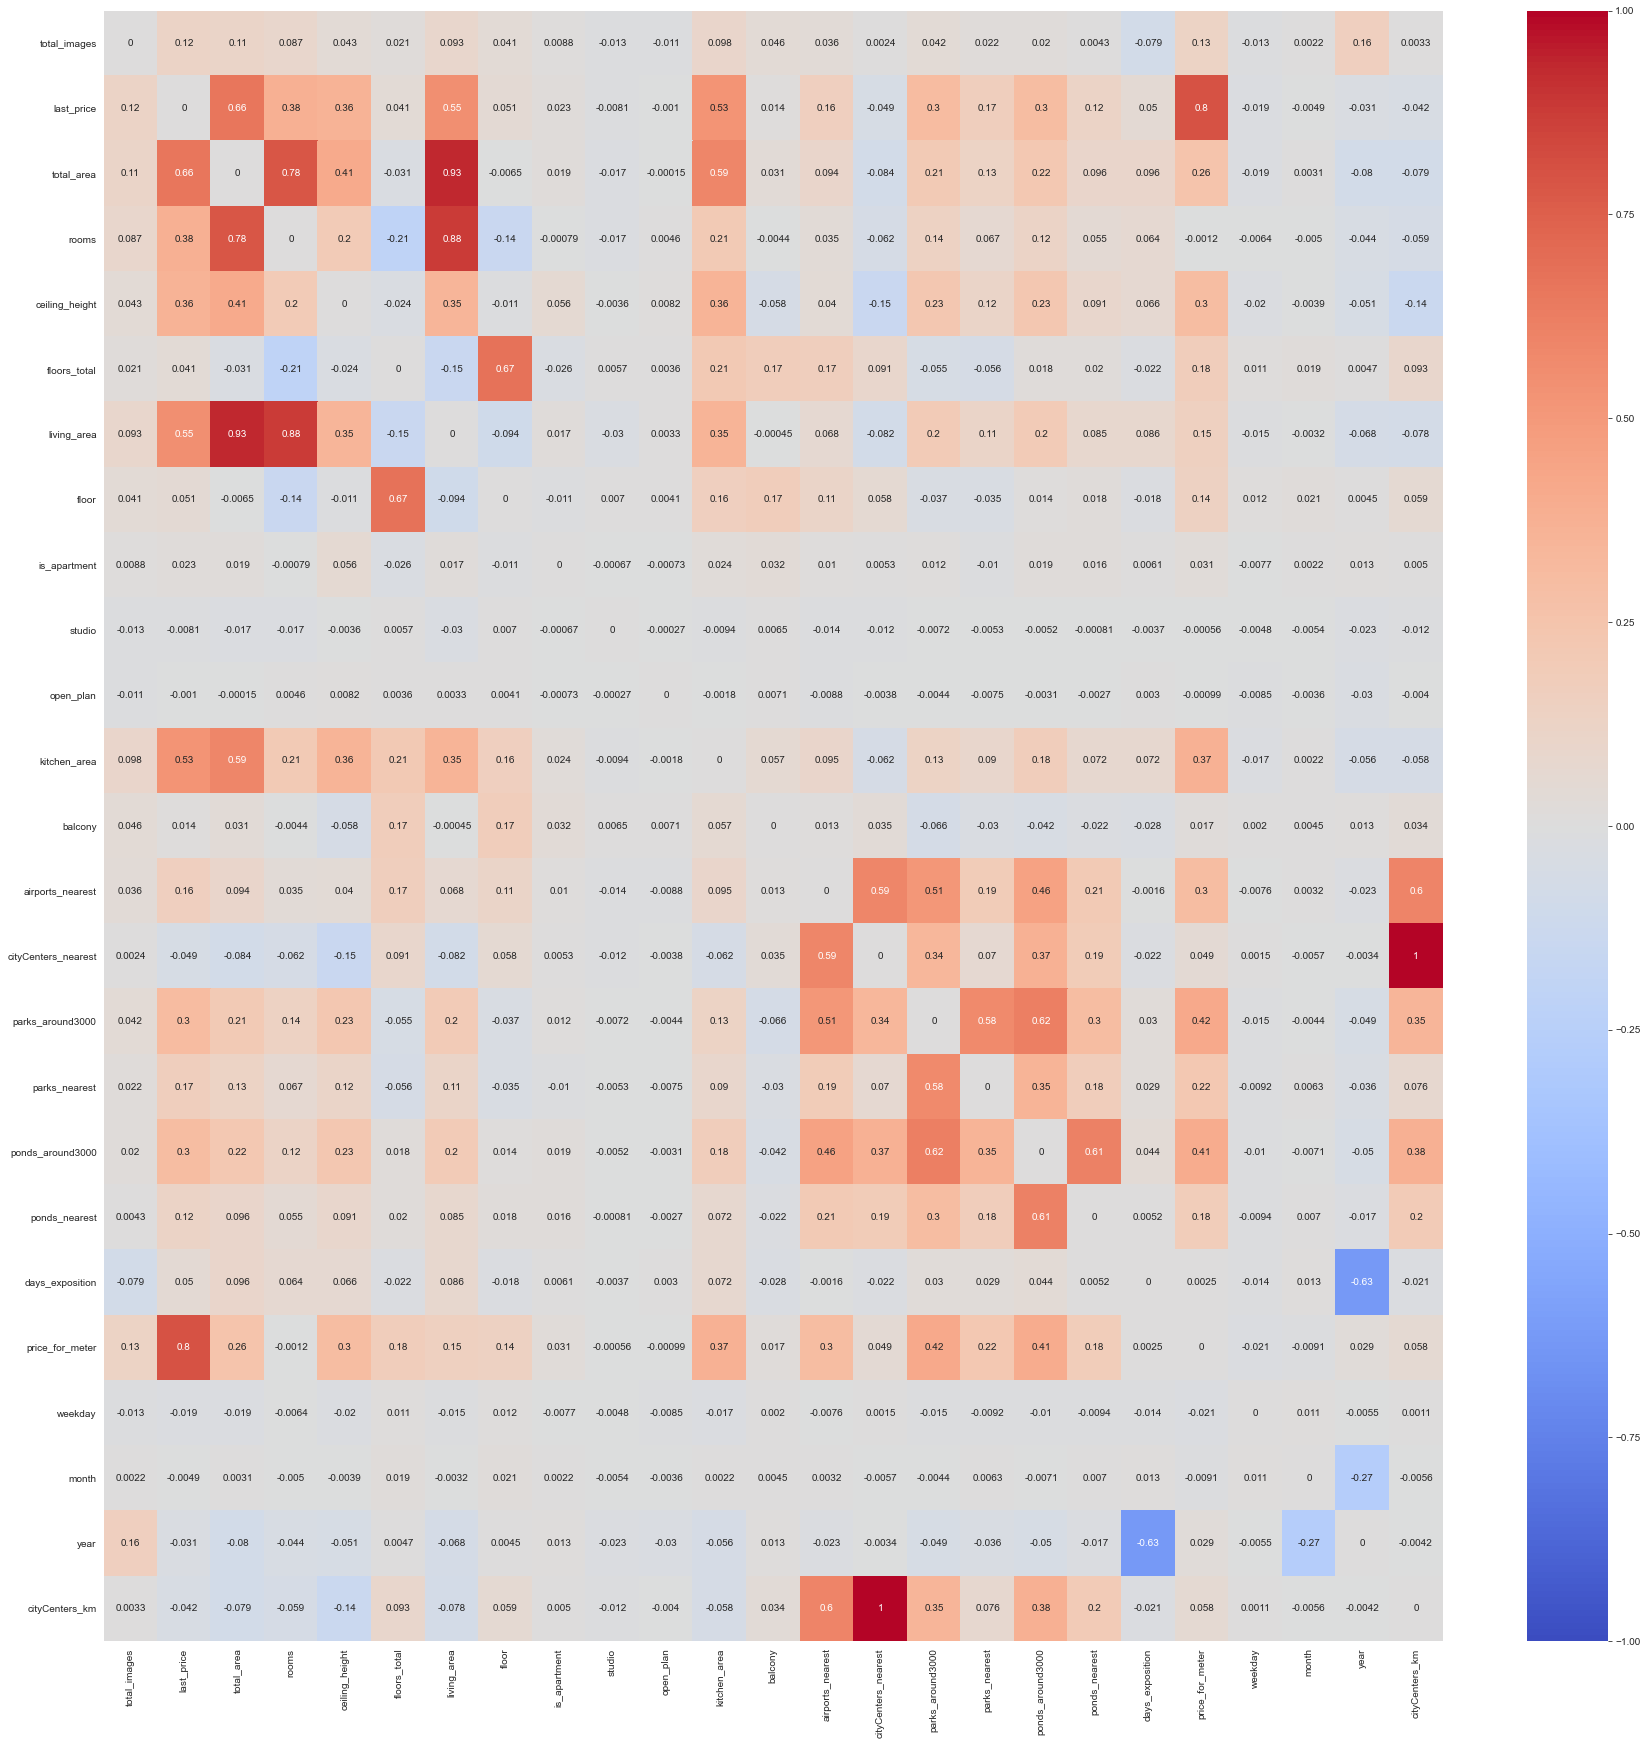

In [116]:
fig, ax = plt.subplots(figsize=(30, 30))
realty_good_data_corr = realty_good_data.corr()
np.fill_diagonal(realty_good_data_corr.values, 0)
sns.heatmap(realty_good_data_corr, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

Есть некоторая корреляция между стоимостью квадратного метра и размером квартиры, высотой потолков, размером кухни, наличием парков. Отрицательная корреляция с расстоянием до центра.

Изучим зависимость цены квадратного метра от общей площади квартиры.

Корреляция цены от total_area 0.25614063107553736


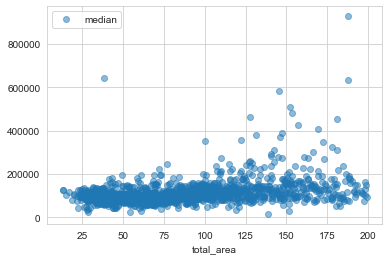

In [117]:
def plot_corr(row, index_name, value_name, style_plot='o', alpha_plot=0.5):
    pivot_table = row.pivot_table(index=index_name, values=value_name, aggfunc=['mean', 'count', 'median'])
    pivot_table.columns = ['mean', 'count', 'median']
    pivot_table.plot(y='median', style=style_plot, alpha=alpha_plot)
    print('Корреляция цены от', index_name, row[index_name].corr(realty_good_data[value_name]))


plot_corr(realty_good_data, 'total_area', 'price_for_meter')

На графиках рассеяния явной зависимости цены квадратного метра и общей площадью квартиры видно, что зависимость очень слабая, чем больше площадь, тем немного выше цена.

Изучим зависимость цены квадратного метра от жилой площади.

Корреляция цены от living_area 0.15026221889243951


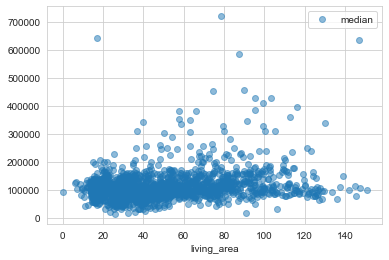

In [118]:
plot_corr(realty_good_data, 'living_area', 'price_for_meter')

На графиках рассеяния явной зависимости цены квадратного метра и жилой площадью квартиры видно, что зависимость очень слабая, чем больше площадь, тем немного выше цена.

Изучим зависимость цены квадратного метра от числа комнат. Чтобы не выбивались из графика очень редкие квартиры, поставим ограничение, на количество объявлений больше 10.

Корреляция цены от rooms -0.001215276944465248


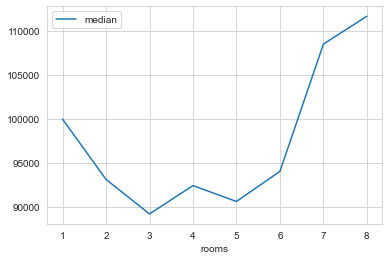

In [119]:
plot_corr(realty_good_data, 'rooms', 'price_for_meter', '', 1)

Самые выгодные по соотношению цены за квадратный метр - трехкомнатные квартиры.

Изучим зависимость цены квадратного метра от этажа (первого или последнего).

,mean,count,median
floor_category,,,
первый,82124.682802,2528,81725.280158
последний,90813.386411,2866,87870.879121


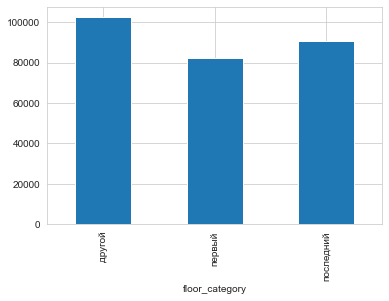

In [120]:
pivot_table_floor_category = realty_good_data.query(
    'floor_category != "другой" and floor_category != "ниже первого"')\
    .pivot_table(index='floor_category', values='price_for_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
realty_good_data.groupby('floor_category')['price_for_meter'].mean().plot(kind='bar', grid=True)
pivot_table_floor_category

Исходя из полученной таблицы, квартиры на первом этаже стоят на 10 тысяч дешевле за квадратный метр.

Изучим зависимость цены квадратного метра от удалённости от центра.

Корреляция цены от cityCenters_nearest -0.3301841124257302


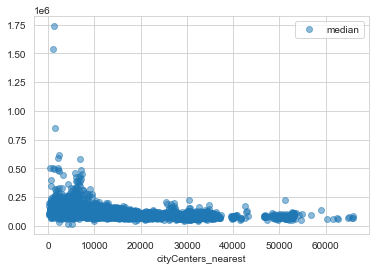

In [121]:
table_cityCenters_nearest = realty_good_data.query('cityCenters_nearest != -1')
plot_corr(table_cityCenters_nearest, 'cityCenters_nearest', 'price_for_meter')

На графиках рассеяния явной зависимости цены квадратного метра и расстоянием до центра видно, что зависимость небольшая, чем ближе к центру, тем немного выше цена.

Изучим зависимость цены квадратного метра от даты размещения: дня недели.

Корреляция цены от weekday -0.020657198766460775


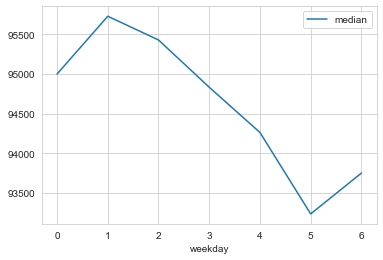

In [122]:
plot_corr(realty_good_data, 'weekday', 'price_for_meter', '', 1)

Середина рабочей недели не лучшее время для покупки жилья, если бы квартиры сдавались в аренду, то график был бы обратным и его был бы легко объяснить) С чем связана разница цен в этом случае сложно сказать.

Изучим зависимость цены квадратного метра от даты размещения: месяца.

Корреляция цены от month -0.009108572204956015


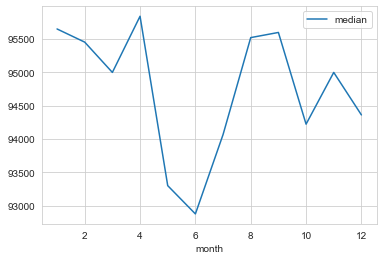

In [123]:
plot_corr(realty_good_data, 'month', 'price_for_meter', '', 1)

Летний спад в отличие от субботнего очень легко объяснить - люди уезжают в отпуска и откладывают покупку на время после отдыха. После новогодних праздников тоже мало кто готов к покупке жилья. Хотелось бы сравнить зависимость скорее по общим датам со ставкой на ипотеку, а не только сезонность.

Изучим зависимость цены квадратного метра от даты размещения: года.

Корреляция цены от year 0.028930667946011738


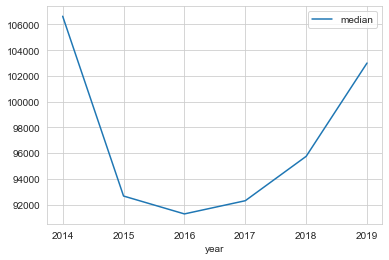

In [124]:
plot_corr(realty_good_data, 'year', 'price_for_meter', '', 1)

В среднем, цена на квадратный метр жилья падала до 2016, а после начала расти. Возможно это связано с тем, что после 2016 года благосостояние людей начало расти, был рост строительства и многие решили сменить жилье на более комфортное. Но стоит учитывать, что на данном графике показатели достаточно усреднены.

Посмотрим на сводные данные по годам. Следует учесть, что за 2014 и 2019 года имеются неполные данные.

<AxesSubplot:xlabel='None-month', ylabel='year'>

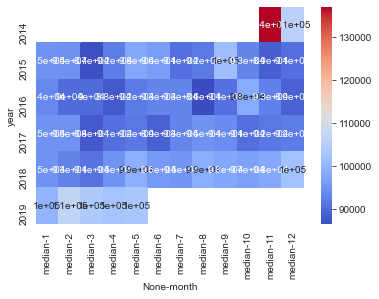

In [125]:
pivot_table_all_year = realty_good_data.pivot_table(index='year', columns='month', values='price_for_meter',
                                                    aggfunc=['median'])
sns.heatmap(pivot_table_all_year, annot=True, cmap='coolwarm')

Что же тепловая карта подтвердила некоторую сезонность цен и их рост начиная с 2018 года.

### Узнаем, какие факторы больше всего влияют на общую стоимость квартиры.
 Изучим, зависит ли цена от следующих параметров:
   - общей площади;
   - жилой площади;
   - площади кухни;
   - количество комнат;
   - типа этажа, на котором расположена квартира (первый, последний, другой);
   - даты размещения (день недели, месяц, год).

Проверим зависимость общей цены от общей площади.

Корреляция цены от total_area 0.6570258763380487


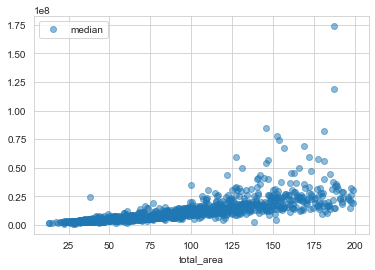

In [126]:
plot_corr(realty_good_data, 'total_area', 'last_price')

Из графика видно, что зависимость цены от площади есть, что логично. При возрастании площади и цена возрастает.

Теперь посмотрим на зависимость цены от жилой площади.

Корреляция цены от living_area 0.5532900084279262


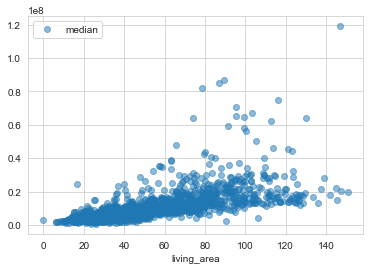

In [127]:
plot_corr(realty_good_data, 'living_area', 'last_price')

Цена растет и с ростом жилой площади.

Теперь посмотрим на зависимость цены от количества комнат.

Корреляция цены от rooms 0.375225584908579


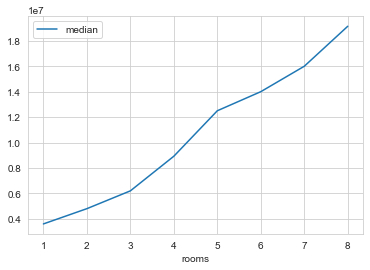

In [128]:
plot_corr(realty_good_data, 'rooms', 'last_price', '', 1)

А вот для увеличивающегося количества комнат цена планомерно растет и нет какого-то плато или спада, как было с ценой за квадратный метр, для трехкомнатных квартир.

Теперь посмотрим на зависимость цены от категории этажа.

,mean,count,median
floor_category,,,
первый,4.738297e+06,2528,3990000
последний,5.912847e+06,2866,4300000


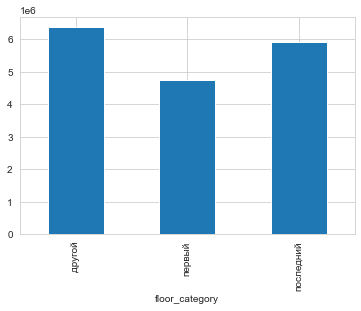

In [129]:
pivot_table_floor_category = realty_good_data.query('floor_category != "другой" '
                                                    'and floor_category != "ниже первого"')\
    .pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
realty_good_data.groupby('floor_category')['last_price'].mean().plot(kind='bar', grid=True)
pivot_table_floor_category

График четко показывает - первый этаж любят меньше всего - поэтому средняя цена ниже всех(чем меньше спрос, тем меньше цена). Более предпочтителен другой этаж - не первый и не последний - на него цена выше.

Зависимость от расстояния до центра.

Корреляция цены от cityCenters_nearest -0.2729955615239858


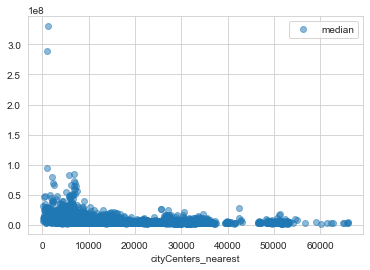

In [139]:
table_cityCenters_nearest = realty_good_data.query('cityCenters_nearest != -1')
plot_corr(table_cityCenters_nearest, 'cityCenters_nearest', 'last_price')

Цена не так уж сильно зависит от расстояния до центра. Надо отметить всплеск продаж на расстоянии 45-55км, возможно там какой-то крупный населенный пункт.

Зависимость от дня недели размещения.

Корреляция цены от weekday -0.01911453256444756


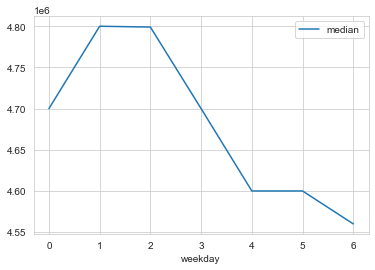

In [131]:
plot_corr(realty_good_data, 'weekday', 'last_price', '', 1)

Как и в случае с ценой за квадратный метр, цены немного выше в середине недели и немного ниже в выходные. С чем это связано не очень понятно.

Зависимость от месяца размещения.

Корреляция цены от month -0.004860686222835492


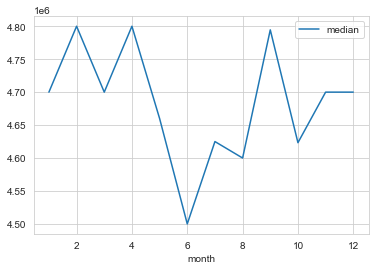

In [132]:
plot_corr(realty_good_data, 'month', 'last_price', '', 1)

Как и с ценой за квадратный метр, общая стоимость квартир падает летом.

Зависимость от года размещения.

Корреляция цены от year -0.030816542945882864


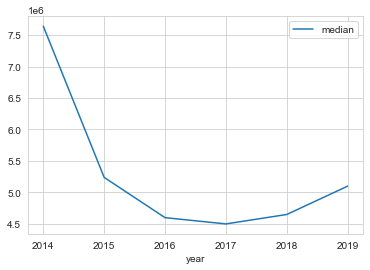

In [133]:
plot_corr(realty_good_data, 'year', 'last_price', '', 1)

Такой же резкий спад цен до 2017 и медленный рост после.

Посмотрим на сводные данные по годам. Следует учесть, что за 2014 и 2019 года имеются неполные данные.

<AxesSubplot:xlabel='None-month', ylabel='year'>

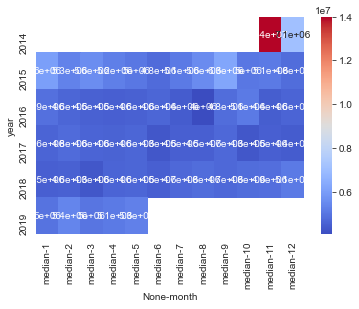

In [134]:
pivot_table_all_year = realty_good_data.pivot_table(index='year', columns='month',
                                                    values='last_price', aggfunc=['median'])
sns.heatmap(pivot_table_all_year, annot=True, cmap='coolwarm')

На стоимость квартиры достаточно сильно влияет её площадь (прямая зависимость). Среднее влияние оказывает удаленность от центра(обратная зависимость) и количество комнат (прямая зависимость). Также надо отметить, что есть зависимость от этажа - первый этаж мало кто любит и цена его существенно отличается от остальных; люди предпочитают не первый и не последний этаж. Дата размещения оказывает самое существенное влияние на цену.

### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
Для этого посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Самая высокая стоимость квадратного метра жилья
                 count           mean
locality_name                        
Санкт-Петербург  13868  112762.490838
Самая низкая стоимость квадратного метра жилья
               count          mean
locality_name                     
Выборг           196  58324.303726


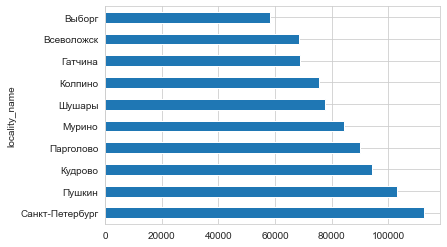

In [135]:
locality_pivot_table = realty_good_data.pivot_table(index='locality_name',
                                                    values='price_for_meter',
                                                    aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending=False).head(10)
locality_pivot_table = locality_pivot_table.sort_values('mean', ascending=False)
#самая высокая стоимость
print('Самая высокая стоимость квадратного метра жилья')
print(locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].max()])
#самая низкая стоимость
print('Самая низкая стоимость квадратного метра жилья')
print(locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].min()])
locality_pivot_table['mean'].plot(grid=True, kind='barh')
plt.ticklabel_format(axis='y')

Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

### Опишем, как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города.
Ранее были посчитаны расстояния до центра Санкт-Петербурга в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра для квадратного метра и общей стоимости квартиры.

Изменение средней цены квадратного метра за каждый километр расстояния от центра 12854.78


,price_for_meter,diff_for_km
cityCenters_km,,
0,162673.317579,NaN
1,155965.388029,6707.929550
2,137828.097531,18137.290498
3,121458.684246,16369.413285
4,133561.727029,12103.042783


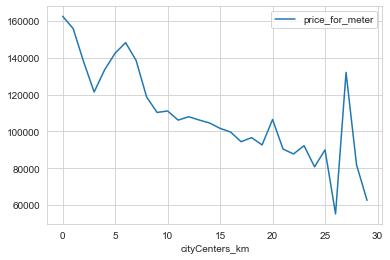

In [136]:
pivot_table_km = realty_good_data.query('locality_name == "Санкт-Петербург"'
                                        ' and cityCenters_km != -1').pivot_table\
    (index='cityCenters_km', values='price_for_meter', aggfunc='mean')
pivot_table_km.plot()
pivot_table_km['diff_for_km'] = abs(pivot_table_km['price_for_meter'].diff())
print('Изменение средней цены квадратного метра за каждый километр расстояния от центра {:.2f}'.format
      (pivot_table_km['diff_for_km'].mean()))
pivot_table_km.head()

Изменение общей средней цены за каждый километр расстояния от центра 1098399.85


,last_price,diff_for_km
cityCenters_km,,
0,1.581410e+07,NaN
1,1.549094e+07,3.231587e+05
2,1.251187e+07,2.979069e+06
3,1.045829e+07,2.053583e+06
4,1.164202e+07,1.183735e+06


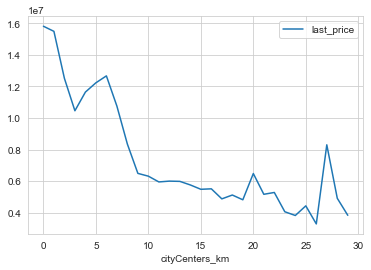

In [137]:
pivot_table_km = realty_good_data.query('locality_name == "Санкт-Петербург"'
                                        ' and cityCenters_km != -1').pivot_table\
    (index='cityCenters_km', values='last_price', aggfunc='mean')
pivot_table_km.plot()
pivot_table_km['diff_for_km'] = abs(pivot_table_km['last_price'].diff())
print('Изменение общей средней цены за каждый километр расстояния от центра {:.2f}'.format
      (pivot_table_km['diff_for_km'].mean()))
pivot_table_km.head()

Центром Питера можно считать радиус примерно 7 км, хотя есть интересный пик в радиусе 27 км, который может быть связан с несколькими поселками, например Всеволожск и Песочный, которые люди, выставляющие объявления, для большей привлекательности записали в Питер. В среднем цена за квадратный метр уменьшается на 12 тысяч с каждым километром от центра, а общая цена уменьшается чуть больше чем на миллион, но это усредненные расчеты.


## Шаг 5. Напишите общий вывод

Изучив предоставленный датасет, была проделана работа по предобработке данных - обработаны пропуски и аномалии, заменили типы данных для удобной работы, убрали дубликаты, добавили новые столбцы с расчетом цены квадратного метра жилья, с категориями по этажам квартир, дополнительно вывели из даты публикации дни недели, месяцы и года размещения объявлений.

Были изучены на наличие выбивающихся значений площадь, цена, число комнат, высота потолков. При изучении времени продажи квартир было выявлено, что большое количество объявлений было автоматически снято с Яндекс.Недвижимости и такие даты из снятия нельзя считать датой продажи квартиры, а значит, изучая средние сроки продажи квартир, такие данные значения не учитывались.

При помощи диаграммы размаха выявлено, что нормальные значения продажи квартир варьируются от 1 до 600 дней. Замечено, что на стоимость квадратного метра квартиры большее влияние оказывают количество комнат, этаж квартиры, близость к центру. Некоторое влияние на стоимость квадратного метра оказывают месяц и год размещения и общая площадь. Так, примерно до августа 2016 цены на жилье падали, после же начался уверенный рост. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 7 километров.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному.